In [12]:
import numpy as np

x_data = np.random.randn(2000, 3)
w_real = [0.3,0.5,0.1]
b_real = -0.2

noise  = np.random.randn(1,2000) * 0.1
y_data = np.matmul( w_real, x_data.T ) + b_real + noise

Text(0.5, 0, 'y')

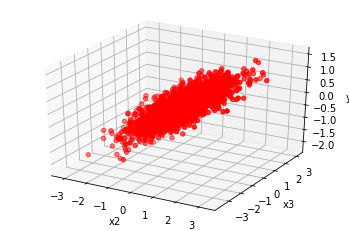

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_data[:,1], x_data[:,2], y_data[:], c='r')

ax.set_xlabel('x2')
ax.set_ylabel('x3')
ax.set_zlabel('y')

In [25]:
import tensorflow as tf

NUM_STEPS = 10
learning_rate = 0.5

g   = tf.Graph()
wb_ = []

with g.as_default():
    x      = tf.placeholder(tf.float32, shape=[None,3])
    y_true = tf.placeholder(tf.float32, shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([0,0,0], dtype=tf.float32, name='weights')
        b = tf.Variable( 0, dtype=tf.float32, name='bias')
        y_pred = tf.matmul( tf.expand_dims(w,0), tf.transpose(x)) + b
    
    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean( tf.square(y_true - y_pred) )
        
    with tf.name_scope('train') as scope:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)
    
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        
        for step in range(NUM_STEPS+1):
            sess.run( train, {x: x_data, y_true: y_data})
            
            if( step % 5 == 0):
                print(step, sess.run([w,b]))
                wb_.append(sess.run([w,b]))

0 [array([0.28038058, 0.4705799 , 0.11046952], dtype=float32), -0.17366494]
5 [array([0.30193275, 0.50109   , 0.10018655], dtype=float32), -0.19941087]
10 [array([0.30193296, 0.50109017, 0.10018639], dtype=float32), -0.199411]
